<a href="https://colab.research.google.com/github/Susheet/StockPrediction_LinearRegression/blob/main/Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AXISBANK.csv to AXISBANK.csv


In [5]:
df = pd.read_csv('AXISBANK.csv')

In [6]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5199,2020-11-23,AXISBANK,EQ,607.85,610.95,612.60,592.70,596.95,595.60,601.27,23728765,1.426744e+15,282449.0,6319602.0,0.2663
5200,2020-11-24,AXISBANK,EQ,595.60,603.00,622.60,600.55,619.00,619.65,612.87,30742369,1.884117e+15,375786.0,9971416.0,0.3244
5201,2020-11-25,AXISBANK,EQ,619.65,625.00,630.00,596.00,598.35,599.85,613.56,35115637,2.154561e+15,345527.0,9454641.0,0.2692
5202,2020-11-26,AXISBANK,EQ,599.85,602.25,618.20,594.05,611.50,612.55,608.19,35476456,2.157653e+15,323021.0,7986804.0,0.2251
5203,2020-11-27,AXISBANK,EQ,612.55,612.00,613.65,598.75,605.10,601.60,605.39,29921076,1.811385e+15,222217.0,14229087.0,0.4756


In [9]:
df2 = df.reset_index()['Close']
df2[:]

0        26.70
1        26.85
2        26.30
3        25.95
4        24.80
         ...  
5199    595.60
5200    619.65
5201    599.85
5202    612.55
5203    601.60
Name: Close, Length: 5204, dtype: float64

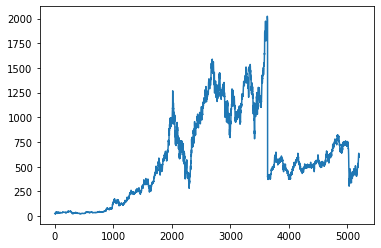

In [10]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [13]:
df2.shape

(5204, 1)

In [14]:
df2

array([[0.00227364],
       [0.00234859],
       [0.00207376],
       ...,
       [0.28867679],
       [0.29502299],
       [0.28955127]])

In [16]:
#splitting the data into training and test
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
train_data,test_data = df2[0:training_size,:],df2[training_size:len(df2),:1]

In [17]:
    len(train_data)

3382

In [18]:
len(test_data)

1822

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)

In [21]:
print(X_train.shape),print(y_train.shape)

(3281, 100)
(3281,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
#Creating the stacked Linear Short Term Memory model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)


Epoch 1/50
52/52 [==============================] - 11s 215ms/step - loss: 9.7156e-05 - val_loss: 4.3767e-04
Epoch 2/50
52/52 [==============================] - 11s 217ms/step - loss: 1.0580e-04 - val_loss: 5.3427e-04
Epoch 3/50
52/52 [==============================] - 11s 219ms/step - loss: 1.0498e-04 - val_loss: 4.3593e-04
Epoch 4/50
52/52 [==============================] - 11s 217ms/step - loss: 9.8397e-05 - val_loss: 4.5553e-04
Epoch 5/50
52/52 [==============================] - 11s 217ms/step - loss: 9.3143e-05 - val_loss: 4.6505e-04
Epoch 6/50
52/52 [==============================] - 11s 216ms/step - loss: 1.0511e-04 - val_loss: 4.5842e-04
Epoch 7/50
52/52 [==============================] - 11s 216ms/step - loss: 9.3069e-05 - val_loss: 4.4701e-04
Epoch 8/50
52/52 [==============================] - 12s 226ms/step - loss: 9.0034e-05 - val_loss: 4.4083e-04
Epoch 9/50
52/52 [==============================] - 12s 226ms/step - loss: 9.3511e-05 - val_loss: 4.3534e-04
Epoch 10/50
52/52 [

In [52]:
import tensorflow as tf


In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [58]:
print(test_predict)

[[1287.0656 ]
 [1301.3258 ]
 [1271.8286 ]
 ...
 [ 615.17487]
 [ 634.73083]
 [ 622.5571 ]]


In [54]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

758.0772280008939

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

720.2159247473438

In [60]:
print(ytest - test_predict)

[[-1286.44040185 -1286.4531442  -1286.45709183 ... -1286.7669809
  -1286.77687496 -1286.77052877]
 [-1300.70065575 -1300.71339811 -1300.71734574 ... -1301.02723481
  -1301.03712887 -1301.03078268]
 [-1271.20346337 -1271.21620573 -1271.22015336 ... -1271.53004242
  -1271.53993649 -1271.5335903 ]
 ...
 [ -614.54971581  -614.56245817  -614.5664058  ...  -614.87629487
   -614.88618893  -614.87984274]
 [ -634.10568505  -634.11842741  -634.12237504 ...  -634.4322641
   -634.44215817  -634.43581197]
 [ -621.931979    -621.94472135  -621.94866898 ...  -622.25855805
   -622.26845211  -622.26210592]]


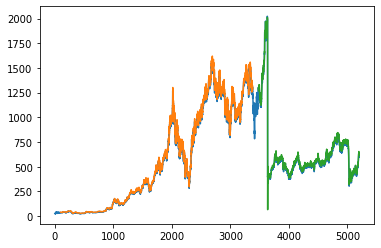

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()